Simple Linear Regression


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
## Read the dataset
df = pd.read_csv('Height_Weight.csv')
df.head()

,height,weight
0,72,155
1,67,145
2,65,125
3,67,120
4,63,105


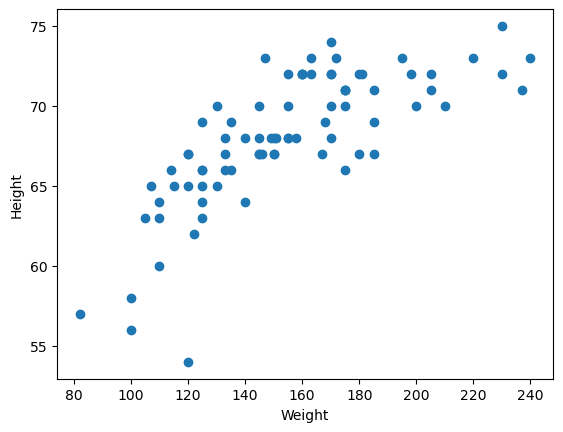

In [17]:
plt.scatter(df['weight'],df['height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [18]:
## Divide our dataset into independent and dependent features
X = df[['weight']]  ## independent feature
y = df['height']  ## dependent feature

In [19]:
## Train test split
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 30)

In [116]:
X.shape

(81, 1)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60, 1), (21, 1), (60,), (21,))

In [118]:
## Standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [119]:
scaler = StandardScaler()

In [120]:
X_train.head()

,weight
58,230
74,150
57,163
20,107
72,181


In [121]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

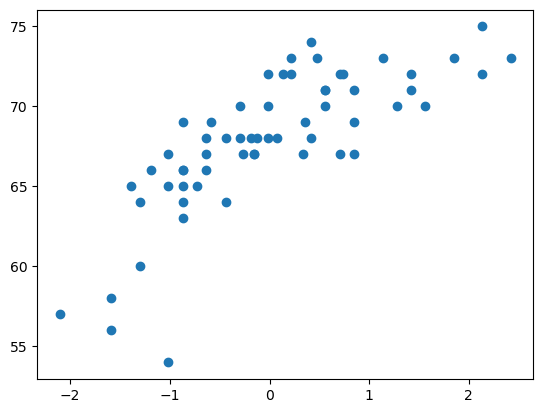

In [122]:
plt.scatter(X_train, y_train)
plt.show()

In [123]:
## Train the Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [124]:
regressor = LinearRegression()

In [125]:
regressor.fit(X_train, y_train)

LinearRegression()

In [126]:
print("The slope or coefficient of weight is ", regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [3.37134781]
Intercept: 67.86666666666666


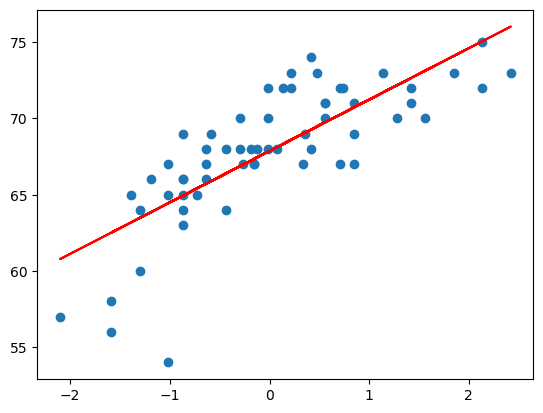

In [127]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')
plt.show()

## Prediction of train data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 68.15625 + 3.44540786(X_train)

## Prediction of test data
1. predicted height output = intercept + coef_(Weight)
2. y_pred_test = 68.15625 + 3.44540786(X_test)

In [128]:
y_pred_test = regressor.predict(X_test)

In [129]:
y_pred_test,y_test

(array([64.64077104, 67.34376588, 69.75715413, 67.05415929, 68.30912118,
        68.30912118, 67.82644353, 69.27447648, 63.48234468, 69.75715413,
        63.96502233, 62.99966702, 64.44769998, 65.41305528, 66.86108823,
        75.742357  , 71.97747132, 69.27447648, 65.89573293, 69.27447648,
        66.86108823]),
 32    62
 73    68
 10    66
 70    73
 8     72
 64    72
 51    68
 55    72
 24    63
 44    71
 34    65
 4     63
 29    67
 63    70
 1     67
 68    71
 56    72
 39    72
 48    66
 21    70
 66    67
 Name: height, dtype: int64)

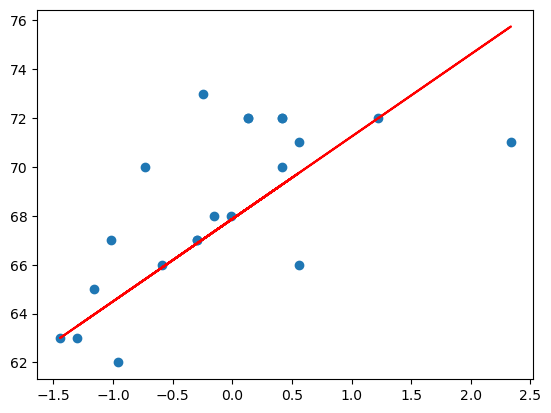

In [130]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')
plt.show()

## Performance Metrics

## MSE, MAE, RMSE

## R square and adjust R square


In [131]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [132]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7.260709539972204
1.9894574714835218
2.6945703813358084


## R square

Formula

1. R^2 = 1-SSR/SST
   
3. R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [133]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [134]:
score

0.3460022657010332

## Adjusted R square

**Adjusted R2 * 1 - [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 pf the model

n: The number of observations

k: The number of predictor variables

In [135]:
# display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.311581332316877

In [136]:
regressor

LinearRegression()

In [137]:
## new data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

D:\Anaconda1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.15948882]])

In [138]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [60.58627877]


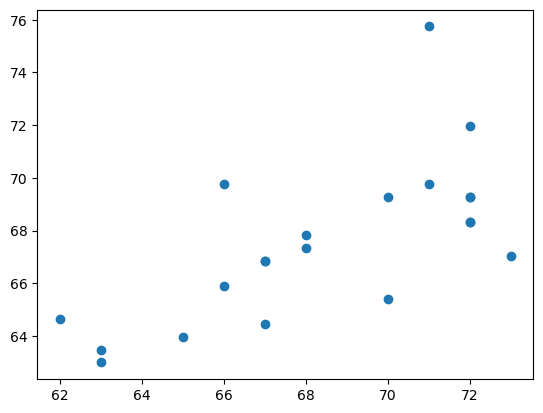

In [139]:
## Assumptions
## plot a scatter plot for the prediction

plt.scatter(y_test, y_pred_test)
plt.show()

In [140]:
## Residuals
residuals = y_test - y_pred_test
residuals

32   -2.640771
73    0.656234
10   -3.757154
70    5.945841
8     3.690879
64    3.690879
51    0.173556
55    2.725524
24   -0.482345
44    1.242846
34    1.034978
4     0.000333
29    2.552300
63    4.586945
1     0.138912
68   -4.742357
56    0.022529
39    2.725524
48    0.104267
21    0.725524
66    0.138912
Name: height, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_8008\871559464.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


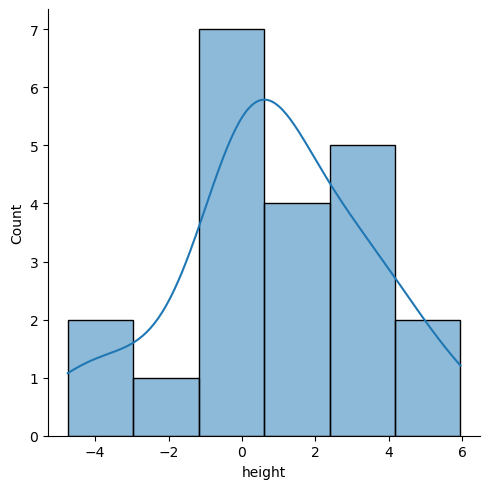

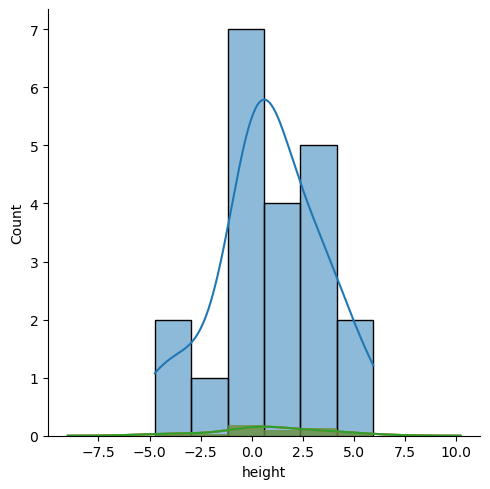

In [145]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals, kde=True)
plt.show()

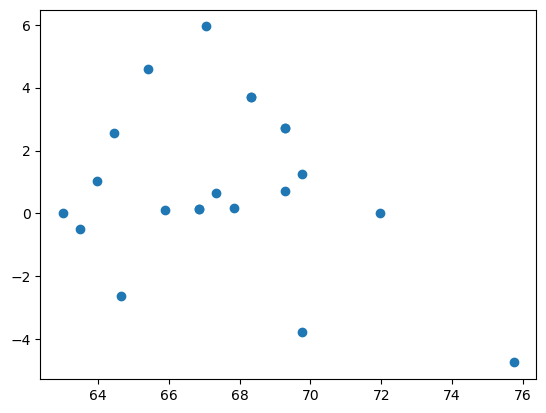

In [146]:
## Scatter plot with respect to prediction and residuals
## uniform distribution 
plt.scatter(y_pred_test, residuals)
plt.show()